# Import libraries

In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [10]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

path = root_path+'/set_of_datafiles'

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


# Run the code in a specific directory

In [11]:
# Go to a define analysis
os.chdir(path)
print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/set_of_datafiles


In [12]:
ls

README.txt
gauss_bg-x0_300-sigma_20-A_300-p_to_bg_20-bin_1.dat
gauss_bg-x0_310-sigma_20-A_150-p_to_bg_10-bin_1.dat


### Example of use of internal functions for two spectra with correlations

In [ ]:
#### Define inputs using internal functions
conf = pynf.Configurator(
    datafiles=['gauss_bg-x0_300-sigma_20-A_300-p_to_bg_20-bin_1.dat', 'gauss_bg-x0_310-sigma_20-A_150-p_to_bg_10-bin_1.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_1(x, A_1, x_1, s, b_g) = \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_1',
        r'gauss_2(x, A_1, x_1, s, b_g) = \texttt{GAUSS_IF}(x, x_1+d, A_2, s) + b_2'], 
    params={                    # function expression in latex form
        'b_1': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'b_2': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'd'  : {'value': 0.2,   'step': -1, 'min': -10, 'max': 30 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data_1={'xmin': 250, 'xmax': 650},# Boundaries of data
    data_2={'xmin': 250, 'xmax': 650},# Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [17]:
# Run the code

# For visualising the progress of the execution use this command
#out = conf.sample(output_mode='live')

# For visualising the progress graphycally (not working in Google Colab), use
# out = conf.sample(output_mode='full')

# If nothing shows, use simply the command (symlink to created or version to be used)
# Create the command to run nested fit in case of need
# run_nested_fit = os.system('nested_fit'+pynf.__version__)
# run_nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
out = conf.sample(output_mode='none')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:15                                                                                   │
│                                                                                                  │
│   12 # run_nested_fit                                                                            │
│   13                                                                                             │
│   14 # For silently running the code and save the raw output in a dictionnary, use this comma    │
│ ❱ 15 out = conf.sample(output_mode='none')                                                       │
│   16                                                                                             │
│                                                                                                  │
│ /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py:598 │
│ in sample                                                                                        │
│                                                                                                  │
│   595 │   │                                                                                      │
│   596 │   │   elif output_mode == 'none':                                                        │
│   597 │   │   │                                                                                  │
│ ❱ 598 │   │   │   self._nf_process = subprocess.Popen(                                           │
│   599 │   │   │   │   [nf_bin],                                                                  │
│   600 │   │   │   │   stdout=subprocess.PIPE, # NOTE: (Cesar) PIPE for errors                    │
│   601 │   │   │   │   cwd=pathlib.Path(path).resolve()                                           │
│                                                                                                  │
│ /opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.1 │
│ 1/subprocess.py:1026 in __init__                                                                 │
│                                                                                                  │
│   1023 │   │   │   │   │   self.stderr = io.TextIOWrapper(self.stderr,                           │
│   1024 │   │   │   │   │   │   │   encoding=encoding, errors=errors)                             │
│   1025 │   │   │                                                                                 │
│ ❱ 1026 │   │   │   self._execute_child(args, executable, preexec_fn, close_fds,                  │
│   1027 │   │   │   │   │   │   │   │   pass_fds, cwd, env,                                       │
│   1028 │   │   │   │   │   │   │   │   startupinfo, creationflags, shell,                        │
│   1029 │   │   │   │   │   │   │   │   p2cread, p2cwrite,                                        │
│                                                                                                  │
│ /opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.1 │
│ 1/subprocess.py:1955 in _execute_child                                                           │
│                                                                                                  │
│   1952 │   │   │   │   │   if errno_num != 0:                                                    │
│   1953 │   │   │   │   │   │   err_msg = os.strerror(errno_num)                                  │
│   1954 │   │   │   │   │   if err_filename is not None:                                          │
│ ❱ 1955 │   │   │   │   │   │   raise child_exception_type(errno_num, err_msg, err_filename)      │
│   1956 │   │   │   │   │   else:                                                                 │
│   1957 │   │   │   │   │   │   raise child_exception_type(e

# Visualize the results TODO!!

In [9]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g']


0 max
nf_output_data_max.dat


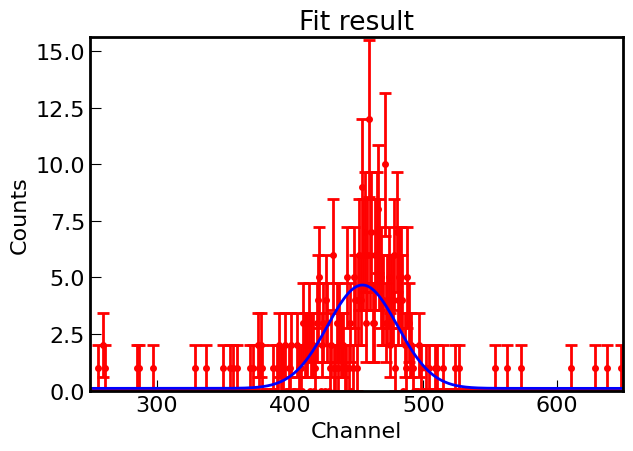

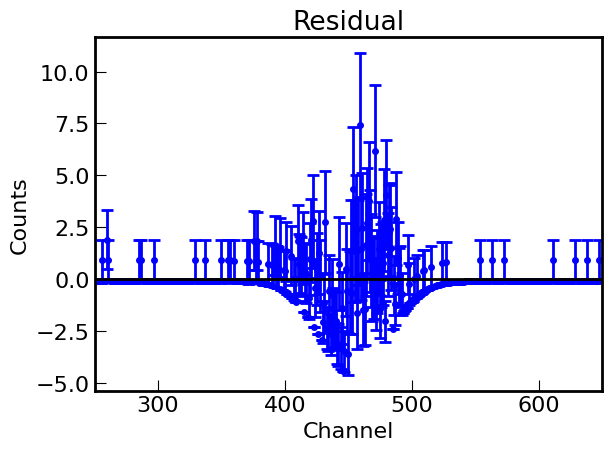

In [10]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

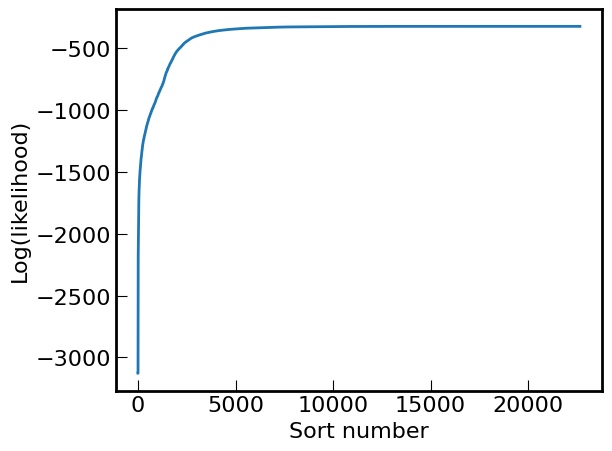

In [11]:
# Plot the likelihood sampling 
an.plot_like()

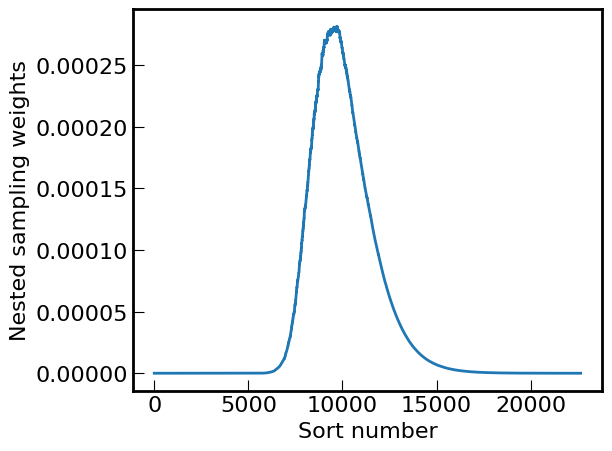

In [12]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

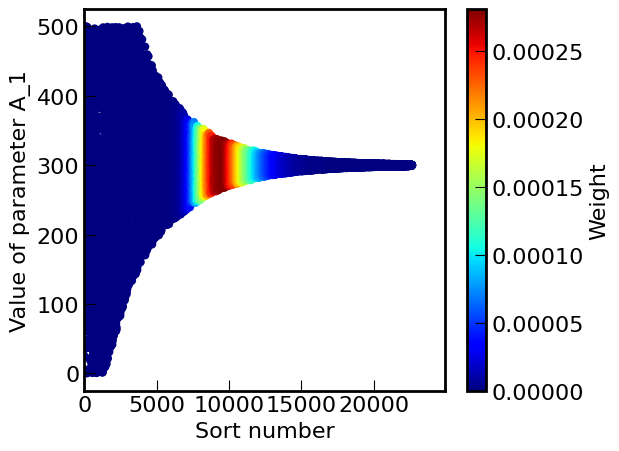

In [13]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

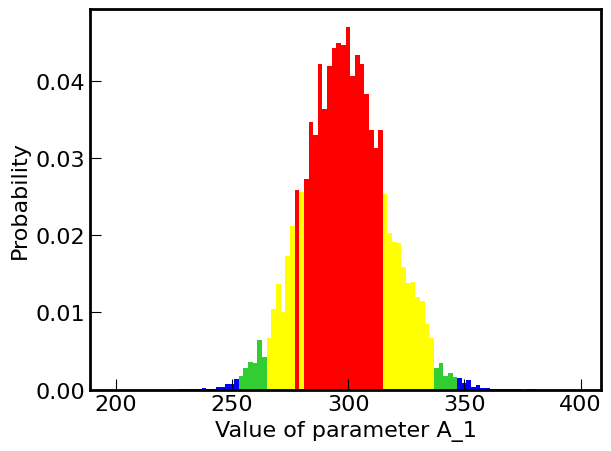

In [14]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

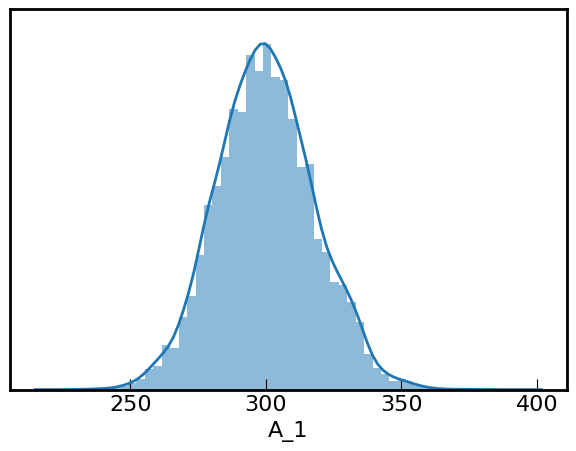

In [15]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('A_1')

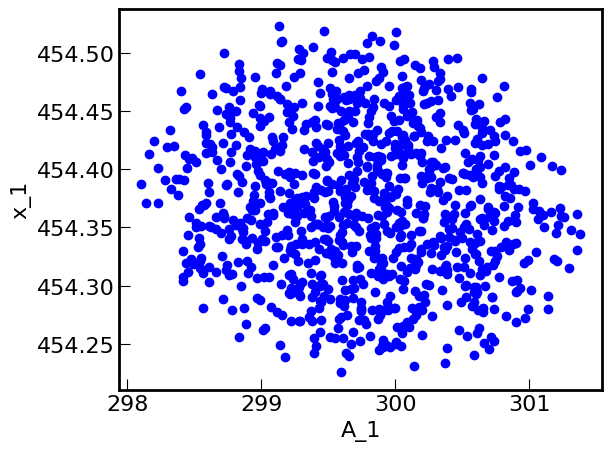

In [16]:
an.plot_live('A_1','x_1')

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

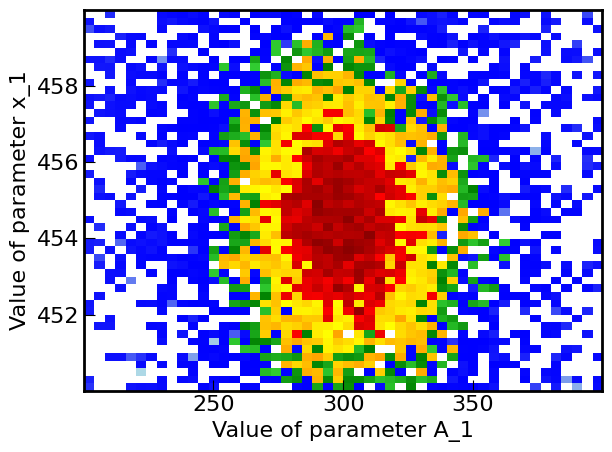

In [17]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

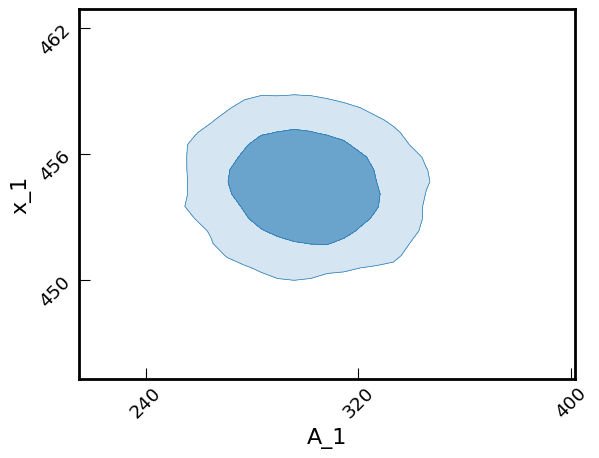

In [18]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('A_1','x_1')


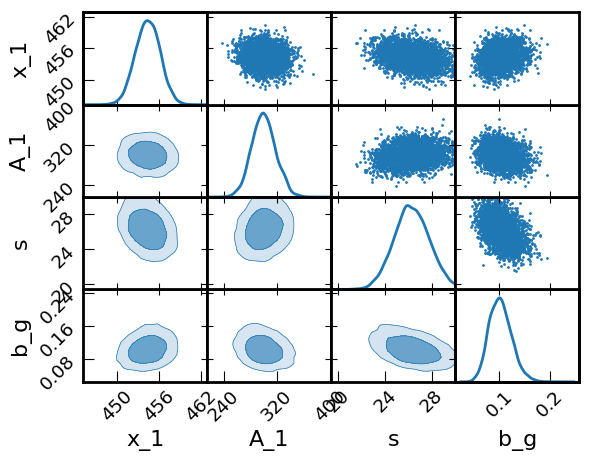

In [19]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

# Extract important data and post-processing
The results can be extracted by the output of the python function: `out = conf.sample()`
Alternatively, another function can be used to read the output ASCII files (`output = an.read_output()`) or the `.json` finles

### Using the python function output

In [20]:
# Extract the raw information of evidence
out[ 'evidence']

{'stddev': 0.0,
 'uncertainty': 0.09062484232146638,
 'value': -338.37697448688994}

In [21]:
# Specific information of output parameters
par_name = 'x_1'
print(par_name, ' = ', out['params'][par_name][ 'mean'],' ± ', out['params'][par_name][ 'std'])

x_1  =  454.4342944854314  ±  1.7215953785392033


In [22]:
# Miscelaneous information
out['meta']

{'bayes_complexity': 3.869519183700959,
 'information': 8.212862045790644,
 'minimal_req_it': 3688,
 'ncores': 10,
 'timereal': 3.0834950001444668,
 'timetotal': 14.893403000000001}

### Using the built in function 'read_output'

In [23]:
# Read the output files in a dictionnary
out = an.read_output()

# Print some results

# The evidence
print('Evidence = ', out['evidence'],'±',out['evidence_err_est'])

# The Bayesian complexity
print('Complexity = ', out['complexity'])

# Some parameter
par_name = 'x_1'
par_index = out['par_name'].index('x_1')
print(par_name, ' = ', out['mean'][par_index],' ± ', out['sd'][par_index])

Evidence =  -338.37697448688994 ± 0.09062484232146638
Complexity =  3.869519183700959
x_1  =  454.4342944854314  ±  1.7215953785392033


In [24]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -338.361257 	± 0.096608
D_KL 	 = 8.201105 	± 0.092845
logL_P 	 = -330.160152 	± 0.031170
d_G 	 = 3.677577 	± 0.099121
